Pergunta: De que maneira(s) o número de veículos por pessoa e desemprego afetam o IDH de um país e que relações existem entre os dois primeiros indicadores (se alguma)?

Introdução: Este projeto foca nas relações entre dados e informações específicas selecionadas pelo aluno e visa analisar tais ocorrências conjuntas utilizando recursos apropriados para uma interpretação concreta. O primeiro conjunto de dados utilizado é o Índice de Desenvolvimento Humano (IDH) que serve como uma medida comparativa para obter o grau de desenvolvimento de países e classificá-los; baseado em dados econômicos e sociais como longetividade, PIB per capita e educação. A segunda informação analisada é o número de carros, veículos de carga e ônibus por 1000 pessoas em cada país, desconciderando automóveis de duas rodas. Esse tipo de dado é especialmente interessante pois pode refletir bastante sobre a sociedade (cultura) e status econômico de um país, como uma região ou local em que as pessoas costumam andar muito mais de bicicleta em comparação com outros veículos por exemplo. O último conjunto de dados reflete na percentagem da população total de um país, grupo etário acima dos 15 anos, que tenha sido registado como desempregado durante o ano de 2005. Essa informação específica é significativa pois pode também indicar as condições econômicas e sociais de um país. É importante notar que o período em que os dados serão analisados é do ano de 2005. O objetivo principal deste projeto é investigar qualquer correlação que possa existir entre os três elementos mencionados. 

In [46]:
%matplotlib inline
import pandas as pd
import numpy as np
import math as math
from scipy import stats
import matplotlib.pyplot as plt

In [47]:
HDI = pd.read_excel('hdi_human_development_index.xlsx')
Desemprego = pd.read_excel('aged_15plus_unemployment_rate_percent.xlsx')
Veiculos = pd.read_excel('cars_trucks_and_buses_per_1000_persons.xlsx')

In [48]:
HDI_2005 = HDI.loc[:, ['geo', 2005]]

Desemprego_2005 = Desemprego.loc[:, ['geo', 2005]]

Veiculos_2005 = Veiculos.loc[:, ['geo', 2005]]


In [49]:
HDI_idx = HDI_2005.set_index('geo')

In [50]:
Desemprego_idx = Desemprego_2005.set_index('geo')

In [51]:
Veiculos_idx = Veiculos_2005.set_index('geo')

Veiculos_idx = Veiculos_idx.add_suffix("_Veiculos")

In [52]:
CD = HDI_idx.join(Desemprego_idx, how='inner', lsuffix='_HDI', rsuffix='_Desemprego')

In [53]:
data = CD.join(Veiculos_idx, how="inner")
data.head(9)

,2005_HDI,2005_Desemprego,2005_Veiculos
geo,,,
Australia,0.915,5.1,671.0
Canada,0.891,6.7,NaN
Czech Republic,0.847,8.3,NaN
Estonia,0.822,7.9,477.0
Finland,0.869,8.3,531.0
France,0.870,9.9,596.0
Germany,0.892,11.1,585.0
Ireland,0.896,4.3,NaN
Japan,0.873,4.4,NaN


In [54]:
correlacao = data.corr()

In [55]:
cov1 = data["2005_HDI"].cov(data["2005_Desemprego"])

var_X1 = data["2005_HDI"].var()
var_Y1 = data["2005_Desemprego"].var()

mX1 = data["2005_HDI"].mean()
mY1 = data["2005_Desemprego"].mean()

a = cov1 / var_X1
b = mY1 - a*mX1

print('Ajuste linear entre IDH e desemprego:')
print('Coeficiente linear:', b)
print('Coeficiente angular:', a)

Ajuste linear entre IDH e desemprego:
Coeficiente linear: 24.22802501168596
Coeficiente angular: -20.08978998128753


Correlação: -0.43046142464024784



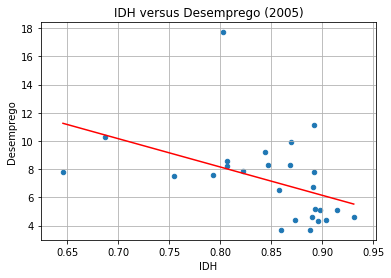

In [56]:
data.plot.scatter(x = "2005_HDI", y = "2005_Desemprego")

plt.plot((data["2005_HDI"].min(), data["2005_HDI"].max()), 
         (a*data["2005_HDI"].min() + b, a*data["2005_HDI"].max() + b), color='red')

plt.title('IDH versus Desemprego (2005)')
plt.xlabel('IDH')
plt.ylabel('Desemprego');
plt.grid()
print('Correlação: {0}\n'.format(correlacao['2005_Desemprego']['2005_HDI']))

Neste "scatter plot", pode-se observar que, apesar de existir um padrão decrescente, não existe uma relação explícita entre o IDH de um país e a taxa de desemprego do mesmo. O índice de correlação acima do gráfico, de -0,43, concretiza a afirmação demonstrando um valor baixo de conexão entre os dois dados. 

In [57]:
cov2 = data["2005_HDI"].cov(data["2005_Veiculos"])

var_X2 = data["2005_HDI"].var()
var_Y2 = data["2005_Veiculos"].var()

mX2 = data["2005_HDI"].mean()
mY2 = data["2005_Veiculos"].mean()

c = cov2 / var_X2
d = mY2 - c*mX2

print('Ajuste linear entre IDH e número de veículos por 1000 pessoas:')
print('Coeficiente linear:', d)
print('Coeficiente angular:', c)

Ajuste linear entre IDH e número de veículos por 1000 pessoas:
Coeficiente linear: -1925.8868015669523
Coeficiente angular: 2807.202402226035


Correlação: 0.845632608296055



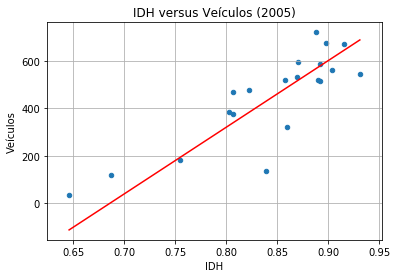

In [69]:
data.plot.scatter(x = "2005_HDI", y = "2005_Veiculos")

plt.plot((data["2005_HDI"].min(), data["2005_HDI"].max()), 
         (c*data["2005_HDI"].min() + d, c*data["2005_HDI"].max() + d), color='red')

plt.title('IDH versus Veículos (2005)')
plt.xlabel('IDH')
plt.ylabel('Veículos');
plt.grid()
print('Correlação: {0}\n'.format(correlacao['2005_Veiculos']['2005_HDI']))

In [59]:
outlier = (data['2005_HDI']<0.85) & (data['2005_Veiculos']<200)
data.loc[outlier, ["2005_HDI", "2005_Veiculos"]].sort_values(by='2005_Veiculos')
##Analisar o país com o maior IDH entre os quatro##

,2005_HDI,2005_Veiculos
geo,,
Philippines,0.646,34.0
Turkey,0.687,117.0
Singapore,0.839,137.0
Romania,0.755,181.0


Diferentemente do gráfico anterior, este "scatter plot" demonstra uma correlação forte entre o Índice de Desenvolvimento Humano e o número de veículos por 1000 pessoas nos diferentes países. Pode-se analisar uma tendência crescente entre os pontos com um alto valor de correlação de 0,846. Apesar desta correspondência entre os dados, é importante detectar e analisar a existência de um "outlier", que, através de um método de filtração de dados, foi encontrado como Cingapura. Partindo desta informação, uma pesquisa foi feita para descobrir os motivos por trás desta "anomalia". Foi encontrado, através do uso dos sites "CostPenguin" e "Dollars and Sense", que é extremamente caro possuir um carro ou qualquer automóvel em Cingapura. Somente cinco fatores explicão o alto investimento que os cidadões fazem em transporte: valor de Mercado Aberto, taxa de inscrição adicional, imposto de consumo, certificado de titularidade e margem dos revendedores. Com essas informações é possivel entender a razão por trás da baixa faixa de veículos em relação ao IDH; como o artigo do "Dollars and Sense" colocou brilhantemente: "Em Cingapura, não existe um bom negócio de carro que faça sentido financeiro."


In [60]:
cov3 = data["2005_Desemprego"].cov(data["2005_Veiculos"])

var_X3 = data["2005_Desemprego"].var()
var_Y3 = data["2005_Veiculos"].var()

mX3 = data["2005_Desemprego"].mean()
mY3 = data["2005_Veiculos"].mean()

e = cov3 / var_X3
f = mY3 - e*mX3

print('Ajuste linear entre desemprego e número de veículos por 1000 pessoas:')
print('Coeficiente linear:', f)
print('Coeficiente angular:', e)

Ajuste linear entre desemprego e número de veículos por 1000 pessoas:
Coeficiente linear: 593.5307813377182
Coeficiente angular: -20.280107770719752


Correlação: -0.29579884325481853



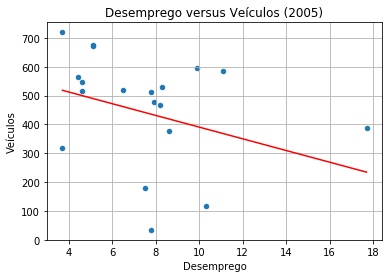

In [61]:
data.plot.scatter(x = "2005_Desemprego", y = "2005_Veiculos")

plt.plot((data["2005_Desemprego"].min(), data["2005_Desemprego"].max()), 
         (e*data["2005_Desemprego"].min() + f, e*data["2005_Desemprego"].max() + f), color='red')

plt.title('Desemprego versus Veículos (2005)')
plt.xlabel('Desemprego')
plt.ylabel('Veículos');
plt.grid()
print('Correlação: {0}\n'.format(correlacao['2005_Desemprego']['2005_Veiculos']))

Assim como o primeiro "scatter plot", este gráfico não disponibiliza nenhuma informação perceptível entre as taxas de veículos e desemprego de um país, obtendo um valor de correlação de -0,296. 

count     20.000000
mean     446.500000
std      196.705631
min       34.000000
25%      362.500000
50%      515.000000
75%      568.500000
max      720.000000
Name: 2005_Veiculos, dtype: float64

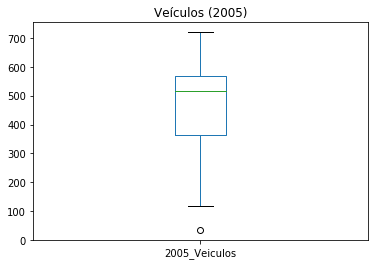

In [62]:
data["2005_Veiculos"].plot.box()
plt.title('Veículos (2005)')
data["2005_Veiculos"].describe()

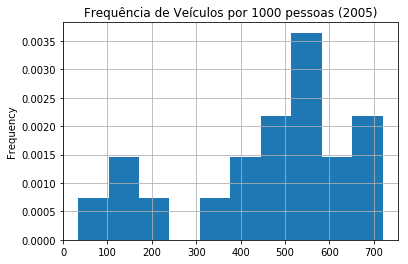

In [68]:
data["2005_Veiculos"].plot(kind='hist', density=True);
plt.title('Frequência de Veículos por 1000 pessoas (2005)')
plt.grid()

Usando o histograma criado, é possível analisar que existe uma frequência maior de veículos do lado direito, fazendo com que a mediana se desloque para a direita. No boxplot, pode-se observar o mesmo, que existe uma disperção menor no terceiro quartil, também alterando a mediana para cima (maior número de veículos com quatro rodas por 1000 pessoas).

count    26.00000
mean      7.25000
std       3.02526
min       3.70000
25%       4.72500
50%       7.55000
75%       8.30000
max      17.70000
Name: 2005_Desemprego, dtype: float64

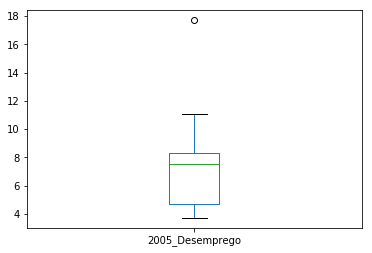

In [66]:
data["2005_Desemprego"].plot.box()
data["2005_Desemprego"].describe()

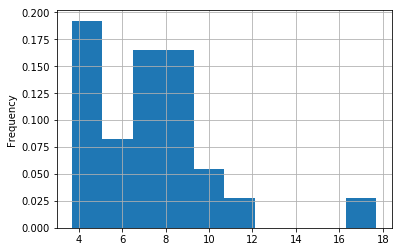

In [67]:
data["2005_Desemprego"].plot(kind='hist', density=True);
plt.grid()

Similarmente à analise acima, o boxplot demonstra uma disperção menor e uma mediana mais elevada, enquanto o histograma afirma uma frequência maior em taxas menores de desemprego, fazendo a mediana tender a esquerda do gráfico.

Conclusão: Em conclusão, é possível se dizer, utilizando o gráfico "IDH versus Veículos", que existe uma correlação forte entre o Índice de Desenvolvimento Humano e o número de veículos automotivos de quatro rodas por 1000 pessoas. Tal resultado indica que quanto mais alto o IDH de um país, maior o número de veículos (por 1000 pessoas). Em relação aos scatter plots "IDH versus Desemprego" e "Desemprego versus Veículos", pode-se concluir que não existe nenhuma conexão concreta entre os índices, enfatizada pelos valores de correlação baixos que os gráficos demonstraram. O boxplot e histograma criados para analisar os índices de veículos por 1000 pessoas indicam que, dos países analisados, existem mais regiões que possuem mais automóveis do que a média. O segundo "set" de gráficos, que investiga o desemprego, valida o fato de que existe uma taxa menor de desemprego na maior parte dos países analisados em 2005. 